In [1]:
import pandas as pd
import ast
import os
from datetime import date, datetime, timedelta

import geopandas as gpd
import pandas as pd
from dotenv import load_dotenv
from shapely.geometry import Point
from sqlalchemy import create_engine

load_dotenv()

True

In [2]:
username = os.getenv("MYSQL_USERNAME")
password = os.getenv("MYSQL_PASSWORD")
target_ip = os.getenv("MYSQL_IP")
target_port = int(os.getenv("MYSQL_PORTT"))
db_name = os.getenv("MYSQL_DB_NAME")

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{target_ip}:{target_port}/{db_name}")

sql = "SELECT 1"

df = pd.read_sql(sql, engine)

In [3]:
df

,1
0,1


In [21]:
def in_boundary(city_geo_data, lat, lon):
    loc_p = Point(lon, lat)
    return city_geo_data.contains(loc_p)

In [22]:
folder = r"C:\Users\add41\Documents\Data_Engineer\Project\example_data"
file = "COUNTY_MOI_1140318.gml"
geo_path = os.path.join(folder, file)
gdf = gpd.read_file(geo_path)

bound_dict = {row["名稱"]:row.geometry for _, row in gdf.iterrows()}

In [23]:
city = "TPE"
city_dict = {
    "TPE":"新北市",
    "TYU":"桃園市",
    "TCH":"臺中市",
    "TNA":"臺南市",
    "KSH":"高雄市"
}

path = r"C:\Users\add41\Documents\Data_Engineer\Project\example_data\gmap_full_search\gmap_salon_TPE.csv"
df_city = pd.read_csv(path)

In [24]:
mask1 = df_city["buss_status"] == "OPERATIONAL"
df_city = df_city[mask1]

# 根據place id去除重複
df_city = df_city.drop_duplicates(subset=["place_id"], keep="first")

df_city.dropna(subset="geometry", inplace=True)
print(f"完成{city}資料處理，共{len(df_city)}筆資料")


df_city.head()

完成TPE資料處理，共697筆資料


,name,place_id,buss_status,geometry,update_time
0,毛樂居寵物美容工作室,ChIJrcvWcAAHaDQRxPNXA-YvmJ0,OPERATIONAL,"{'lat': 24.8614266, 'lng': 121.5515846}",2025/10/30 09:43:54
6,微笑寵物沙龍,ChIJixoymXH7ZzQRFSr81jB7bCw,OPERATIONAL,"{'lat': 24.8368024, 'lng': 121.7858751}",2025/10/30 09:43:54
10,星光貓舍｜曼赤肯｜英短｜小步舞曲｜英長｜貓咪洗澡美容｜貓咪住宿 ｜新北貓舍,ChIJAzTNiZwbaDQR2mvg56n4wqs,OPERATIONAL,"{'lat': 24.9437539, 'lng': 121.359142}",2025/10/30 09:43:54
11,新同學寵物美容,ChIJXw9AYwAbaDQRBDA5TNAQCs0,OPERATIONAL,"{'lat': 24.9381469, 'lng': 121.3710623}",2025/10/30 09:43:54
12,妙比寵物美容,ChIJzQCMsvMbaDQR_f3E73dCPMI,OPERATIONAL,"{'lat': 24.9359129, 'lng': 121.3733128}",2025/10/30 09:43:54


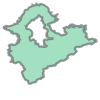

In [25]:
city_ch_name = city_dict[city]
city_geo_data = bound_dict[city_ch_name]

city_geo_data

In [26]:
boundary_list = []
df_city["geometry"] = df_city["geometry"].apply(ast.literal_eval)
for index, row in df_city.iterrows():
    lat = row["geometry"].get("lat", None)
    lon = row["geometry"].get("lng", None)
    if lat == None or lon == None:
        boundary_list.append(False)
    else:
        boundary_list.append(in_boundary(city_geo_data, lat, lon))

df_city['in_boundary'] = boundary_list

df_city.head()

,name,place_id,buss_status,geometry,update_time,in_boundary
0,毛樂居寵物美容工作室,ChIJrcvWcAAHaDQRxPNXA-YvmJ0,OPERATIONAL,"{'lat': 24.8614266, 'lng': 121.5515846}",2025/10/30 09:43:54,True
6,微笑寵物沙龍,ChIJixoymXH7ZzQRFSr81jB7bCw,OPERATIONAL,"{'lat': 24.8368024, 'lng': 121.7858751}",2025/10/30 09:43:54,False
10,星光貓舍｜曼赤肯｜英短｜小步舞曲｜英長｜貓咪洗澡美容｜貓咪住宿 ｜新北貓舍,ChIJAzTNiZwbaDQR2mvg56n4wqs,OPERATIONAL,"{'lat': 24.9437539, 'lng': 121.359142}",2025/10/30 09:43:54,True
11,新同學寵物美容,ChIJXw9AYwAbaDQRBDA5TNAQCs0,OPERATIONAL,"{'lat': 24.9381469, 'lng': 121.3710623}",2025/10/30 09:43:54,True
12,妙比寵物美容,ChIJzQCMsvMbaDQR_f3E73dCPMI,OPERATIONAL,"{'lat': 24.9359129, 'lng': 121.3733128}",2025/10/30 09:43:54,True
